# Climate-Smart Precision Agriculture 

This project looks at understanding the relationships between climate variables and crop yield in the context of climate change. It explores how climate factors (temperature, precipitation, CO2 emissions, etc.) affect agricultural productivity across different regions and time periods.

Project Goals:

- **Feature Importance**: The feature importance analysis revealed that factors like temperature and precipitation are critical in determining crop yield. These variables showed the highest importance in both Random Forest and XGBoost models.

- **Correlation**: A strong positive correlation was observed between temperature and crop yield in some regions, while precipitation had a varying impact depending on the crop type.

- **Trends Over Time**: The analysis of trends over time revealed shifts in temperature and precipitation patterns, with potential correlations to fluctuations in crop yield, which may indicate the effects of climate change.

- **Climate Change Impact**: The results suggest that increasing temperatures may lead to decreased crop yield, especially in regions where temperature rise is more pronounced.

#### Dataset Description

The dataset provides real-time data for smart logistics operations over the past year (2024). It includes information on asset tracking, inventory levels, shipment statuses, environmental conditions, traffic, and user behaviors. The data is enriched with IoT sensor data, such as temperature, humidity, and asset utilization, to facilitate advanced logistics optimization and decision-making.

##### Key Features:

- **Timestamp**: Date and time of logistics activity.
- **Asset_ID**: Unique identifier for logistical assets (e.g., trucks).
- **Latitude & Longitude**: Geographical coordinates for asset tracking.
- **Inventory_Level**: Current inventory level associated with the asset or shipment.
- **Shipment_Status**: Status of the shipment (e.g., In Transit, Delivered, Delayed).
- **Temperature**: Temperature recorded during transportation.
- **Humidity**: Humidity level at the time of recording.
- **Traffic_Status**: Current traffic condition (e.g., Clear, Heavy, Detour).
- **Waiting_Time**: Time spent waiting during logistics (in minutes).
- **User_Transaction_Amount**: Monetary amount associated with user transactions.
- **User_Purchase_Frequency**: Frequency of purchases made by the user.
- **Logistics_Delay_Reason**: Reason for delays (e.g., Weather, Mechanical Failure).
- **Asset_Utilization**: Percentage of asset utilization.
- **Demand_Forecast**: Predicted demand for logistics services.
- **Logistics_Delay (Target)**: Binary variable indicating whether a delay occurred (1 for delay, 0 for no delay).

##### Challenges and Limitations
- **Model Performance**: The relatively low R² scores and high prediction errors suggest that the models may not fully capture the complexity of the relationships between climate variables and crop yield. This could be due to insufficient feature engineering, data quality issues, or the need for more advanced modeling techniques.
- **Data Granularity**: The dataset lacked granularity in certain areas, such as soil health metrics or crop-specific data, which could improve model accuracy.
- **Non-Linearity**: The non-linear relationships between climate variables and crop yield pose challenges for traditional regression models, necessitating the use of more sophisticated algorithms or ensemble methods.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('climate_change_impact_on_agriculture_2024.csv')

df.head()

Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

In [3]:
# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

## 1. Exploratory Data Analysis (EDA)

Understand climate trends, crop yields, and their relationships.

In [4]:
df.describe()

Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25%            7.760000              1.449000                2.000000   
50%           15.200000              2.170000                5.000000   
75%           22.820000              2.930000                8.000000   
max           30.000000              5.000000               10.000000   

       Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
count         10000.000000             10000.000000              10000.000000   
mean             55.248332                24.955735                 49.973708   
std              25.988305                14.490962                 28.711027   
min              10.010000                 0.000000                  0.010000   
25%              32.677500                12.527500                 25.390000   
50%              55.175000                24.930000                 49.635000   
75%              77.582500                37.470000                 74.825000   
max              99.990000                49.990000                 99.990000   

       Soil_Health_Index  Economic_Impact_Million_USD  
count       10000.000000                 10000.000000  
mean           64.901278                   674.269658  
std            20.195882                   414.591431  
min            30.000000                    47.840000  
25%            47.235000                   350.545000  
50%            64.650000                   583.920000  
75%            82.472500                   917.505000  
max           100.000000                  2346.470000

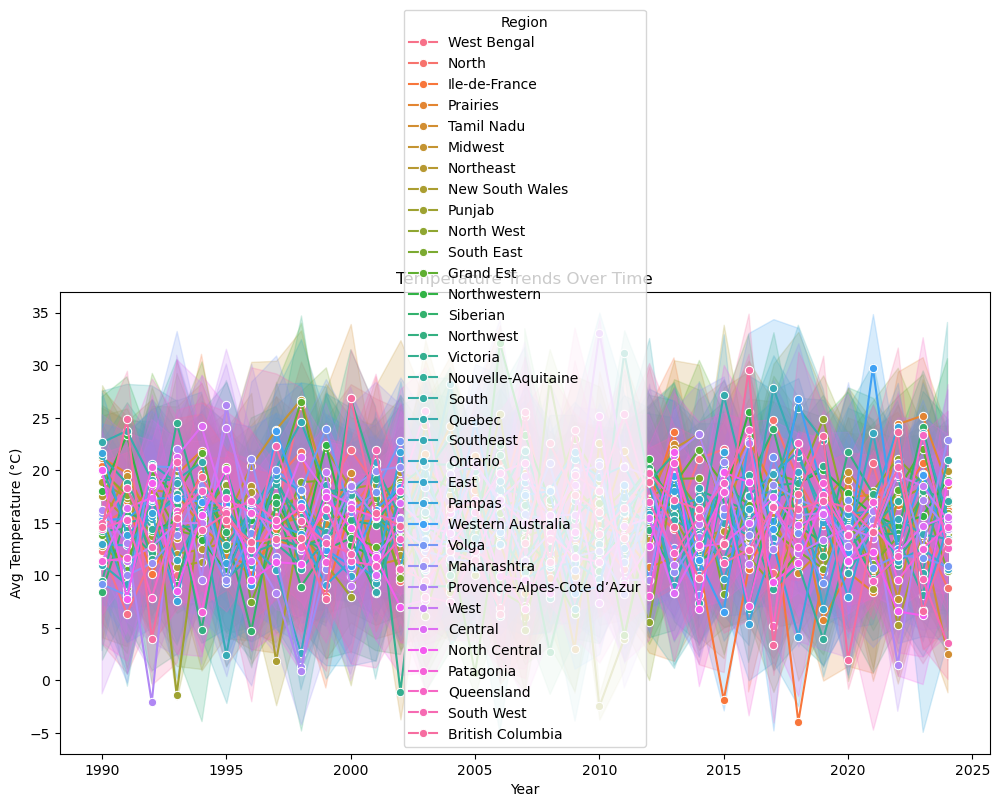

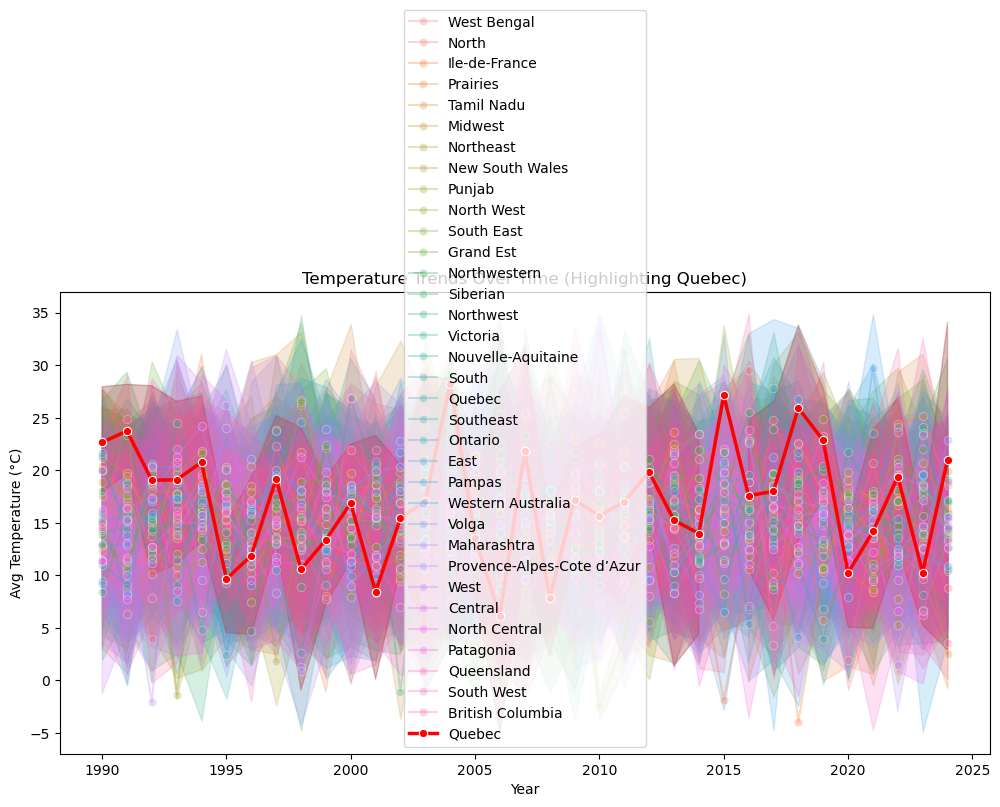

In [10]:
# Climate trends over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Average_Temperature_C', data=df, hue='Region', marker='o')
plt.title('Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.show()

# Filter Quebec data
quebec_df = df[df['Region'] == 'Quebec']

# Climate trends over time (Highlighting Quebec)
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Average_Temperature_C', data=df, hue='Region', alpha=0.3, marker='o')  # Faded other regions
sns.lineplot(x='Year', y='Average_Temperature_C', data=quebec_df, color='red', linewidth=2.5, marker='o', label='Quebec')  # Highlight Quebec
plt.title('Temperature Trends Over Time (Highlighting Quebec)')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.show()

### Crop Yield Impact Analysis

Is temperature helping or hurting crop yield? Different crops might behave differently.

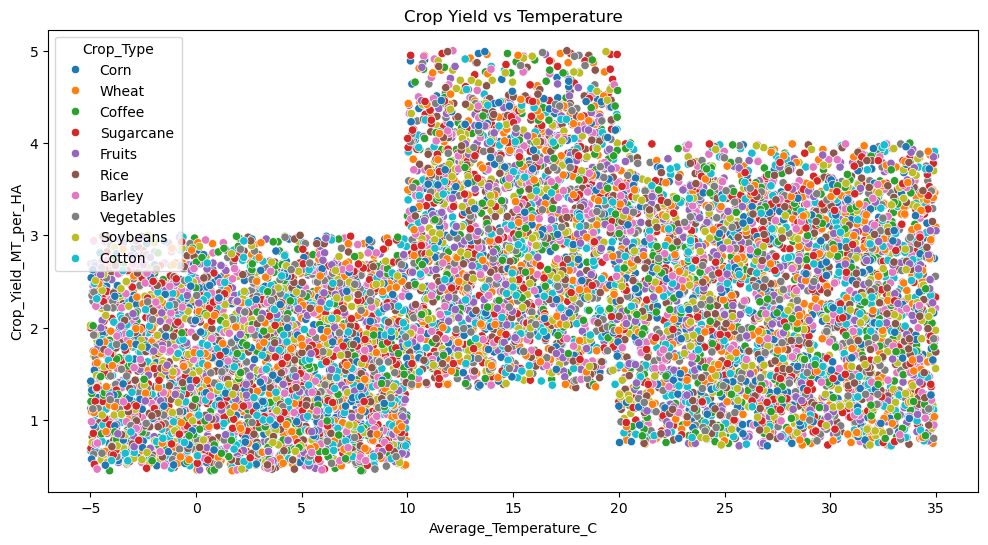

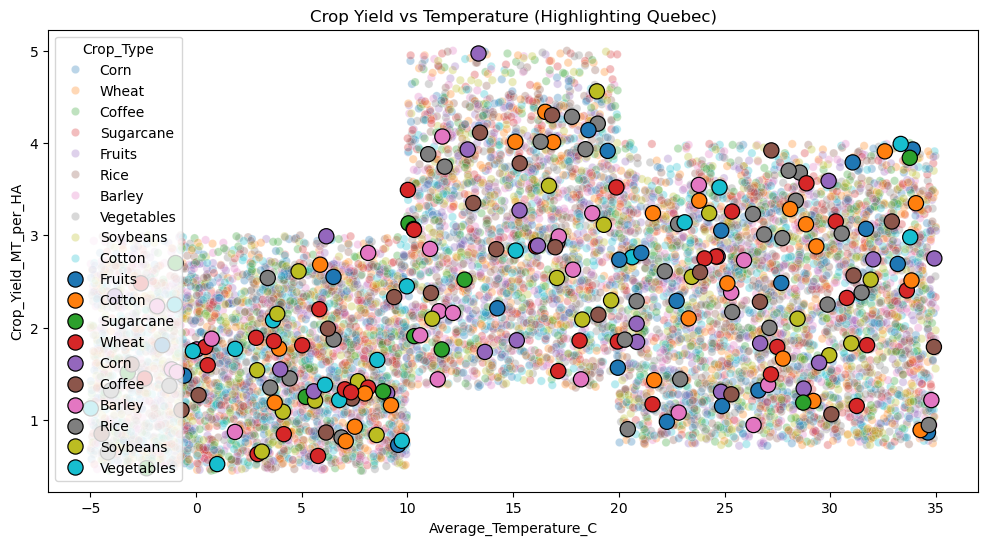

In [11]:
# Crop Yield vs Climate Factors
plt.figure(figsize=(12,6))
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', hue='Crop_Type', data=df)
plt.title('Crop Yield vs Temperature')
plt.show()

# Crop Yield vs Temperature (Highlighting Quebec)
plt.figure(figsize=(12,6))
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', hue='Crop_Type', data=df, alpha=0.3)  # Faded other crops
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', hue='Crop_Type', data=quebec_df, edgecolor='black', s=120)  # Highlight Quebec crops
plt.title('Crop Yield vs Temperature (Highlighting Quebec)')
plt.show()

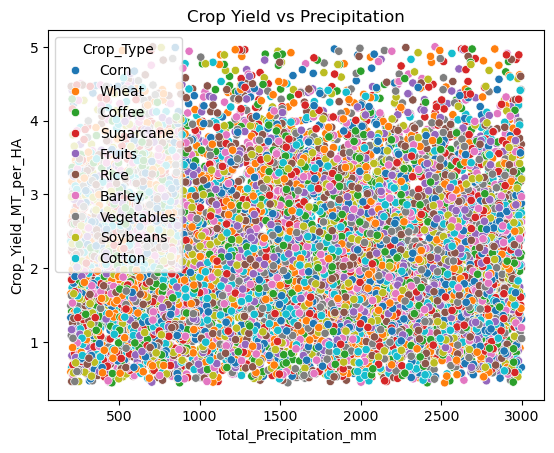

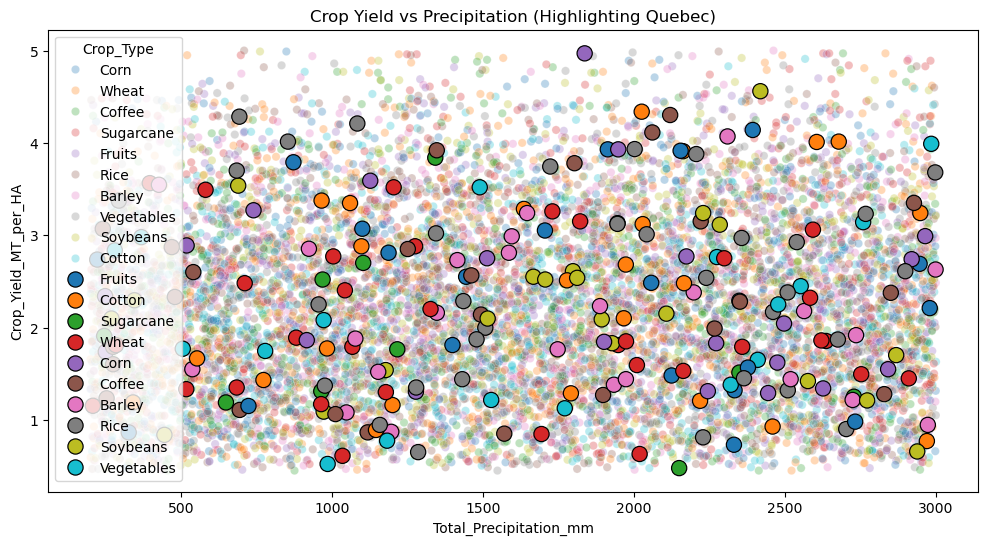

In [12]:
sns.scatterplot(x='Total_Precipitation_mm', y='Crop_Yield_MT_per_HA', hue='Crop_Type', data=df)
plt.title('Crop Yield vs Precipitation')
plt.show()

# Crop Yield vs Precipitation (Highlighting Quebec)
plt.figure(figsize=(12,6))
sns.scatterplot(x='Total_Precipitation_mm', y='Crop_Yield_MT_per_HA', hue='Crop_Type', data=df, alpha=0.3)  # Faded other crops
sns.scatterplot(x='Total_Precipitation_mm', y='Crop_Yield_MT_per_HA', hue='Crop_Type', data=quebec_df, edgecolor='black', s=120)  # Highlight Quebec crops
plt.title('Crop Yield vs Precipitation (Highlighting Quebec)')
plt.show()

## 2. Data Preprocessing

Handle missing values, outliers, and feature engineering.

### Feature Engineering & Preprocessing

In [13]:
# Prepare data for machine learning models.

# Create new features that may help the model
df['Temp_x_Precip'] = df['Average_Temperature_C'] * df['Total_Precipitation_mm']
df['CO2_x_Fertilizer'] = df['CO2_Emissions_MT'] * df['Fertilizer_Use_KG_per_HA']
df['Weather_Risk'] = df['Extreme_Weather_Events'] / (df['Irrigation_Access_%'] + 1)  # Avoid division by zero

# Add new features to the list
features = ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 
            'Extreme_Weather_Events', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 
            'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index',
            'Temp_x_Precip', 'CO2_x_Fertilizer', 'Weather_Risk']

X = df[features]
y = df['Crop_Yield_MT_per_HA']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Predictive Modeling 

Use machine learning to predict crop yield based on climate factors.

In [16]:
# Build Predictive Models
# Train and evaluate regression models.

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

MAE: 0.725844015
MSE: 0.73983352773535
R² Score: 0.29904953908259235


### Interpretation

This score indicates how well the model explains the variance in the data. A score of 0.2990 means that approximately 29.9% of the variance is explained by the model, suggesting the model's performance is weak (a value closer to 1 would be ideal, indicating a stronger model).

## 4. Feature Selection

Check Feature Importance.

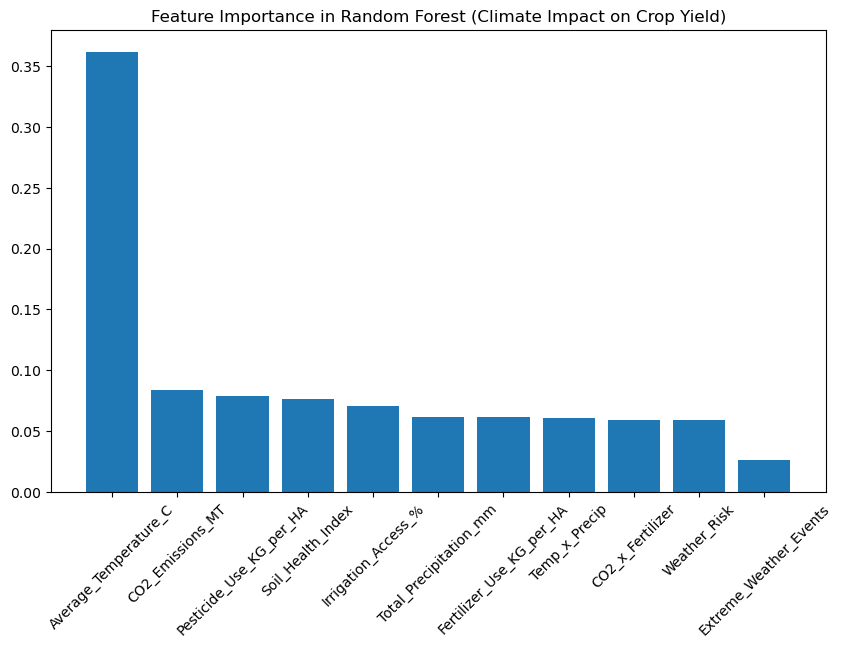

In [29]:
# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.title("Feature Importance in Random Forest (Climate Impact on Crop Yield)")
plt.show()

### Key Insights from Feature Importance:
- Temperature is the most influential factors for crop yield.
- CO2 emissions and fertilizer use have moderate impacts.

## 5. Hyperparameter Tuning

Optimize the Model.

In [18]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


## 6. Try XGBoost for Better Performance

In [19]:
# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost MAE: {mae_xgb}')
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost R² Score: {r2_xgb}')


XGBoost MAE: 0.7360330372436047
XGBoost MSE: 0.7708763153447711
XGBoost R² Score: 0.2696382519926558


### Interpretation

Both models are performing poorly with low R² values, suggesting they don't explain much of the variance. The MAE and MSE metrics indicate errors in predictions, and the XGBoost model does slightly worse.

## 7. Visualization

Climate change trends, yield impact, regional comparisons.

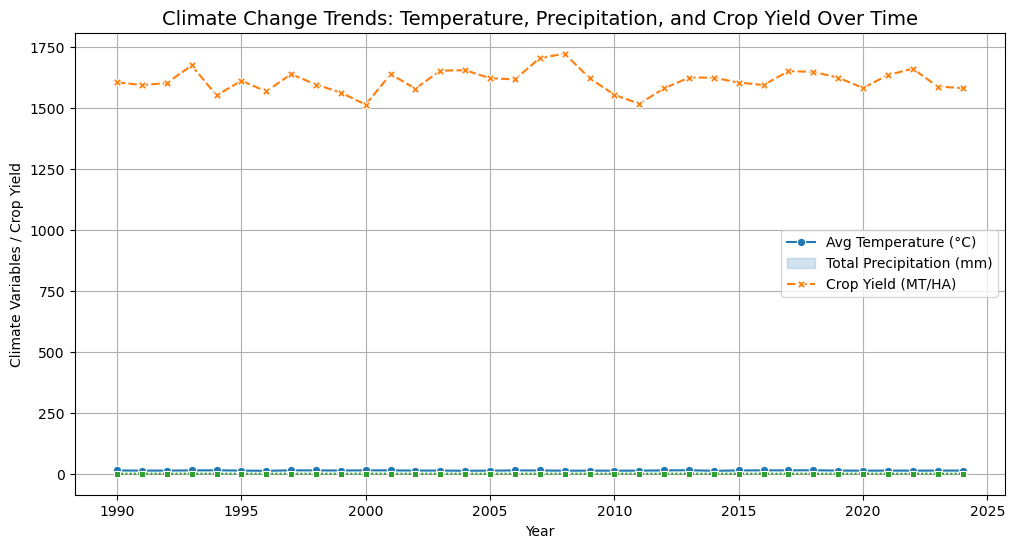

In [26]:
# Group data by year and calculate mean temperature, precipitation, and crop yield
climate_trends = df.groupby("Year")[["Average_Temperature_C", "Total_Precipitation_mm", "Crop_Yield_MT_per_HA"]].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=climate_trends, markers=True)
plt.title("Climate Change Trends: Temperature, Precipitation, and Crop Yield Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Climate Variables / Crop Yield")
plt.legend(["Avg Temperature (°C)", "Total Precipitation (mm)", "Crop Yield (MT/HA)"])
plt.grid(True)
plt.show()

####  Correlation Analysis

Let's look at a correlation heatmap to identify relationships between climate variables and crop yield.

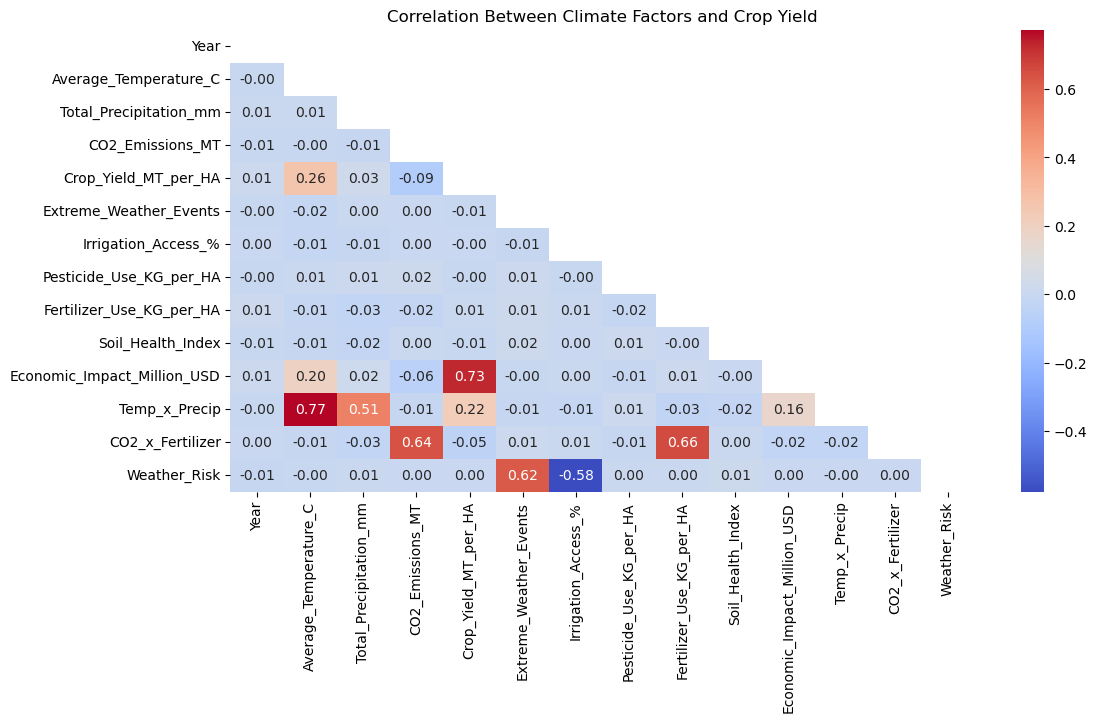

In [21]:
# Heatmap – Correlation Between Climate & Yield Factors
# Helps identify which climate factors strongly affect crop yield.

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
plt.figure(figsize=(12, 6))
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask for upper triangle

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Between Climate Factors and Crop Yield")
plt.show()

### Interpretation

Temperature × Precipitation and CO2 × Fertilizer show moderate to strong correlations with the weather-related risk and the impact of agricultural practices, suggesting these features could be influential in predicting outcomes related to agriculture and environmental factors.

Summary: This correlation matrix provides insights into the relationships between various environmental, agricultural, and economic variables. Strong positive correlations between factors like crop yield and economic impact, or temperature and precipitation, could help inform future model improvements by highlighting relevant features.

### Regional Comparisons

Crop Yield by Region.

**Which regions have the best and worst crop yields? Helps in climate adaptation planning.**

C:\Users\milto\AppData\Local\Temp\ipykernel_17720\956438730.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Region", y="Crop_Yield_MT_per_HA", hue="Crop_Type", ci=None)


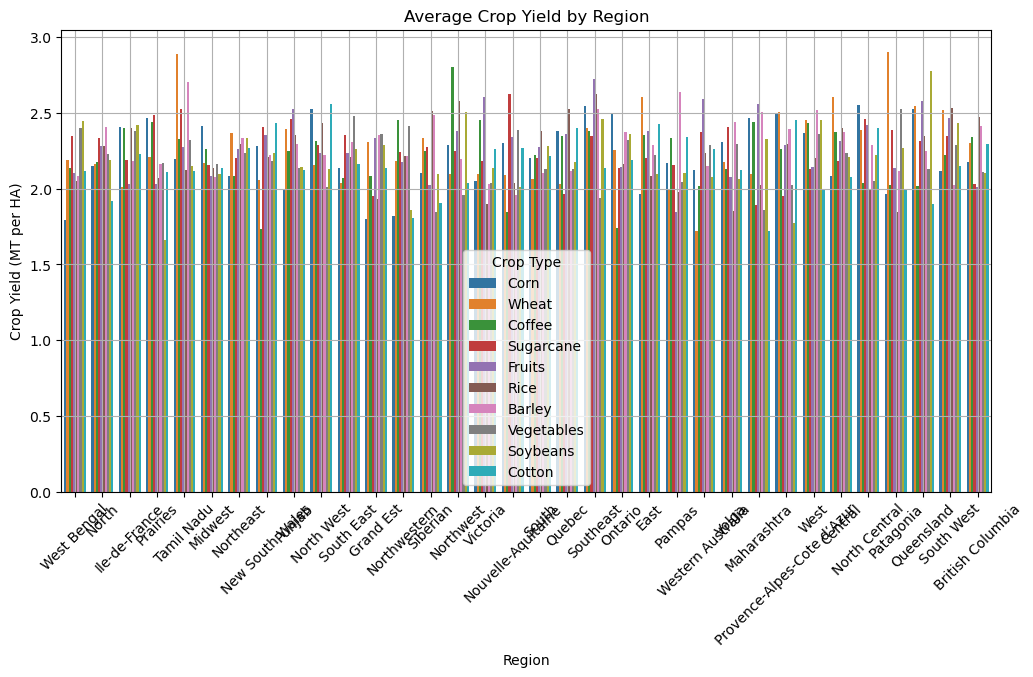

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Region", y="Crop_Yield_MT_per_HA", hue="Crop_Type", ci=None)
plt.title("Average Crop Yield by Region")
plt.xlabel("Region")
plt.ylabel("Crop Yield (MT per HA)")
plt.xticks(rotation=45)
plt.legend(title="Crop Type")
plt.grid(True)
plt.show()

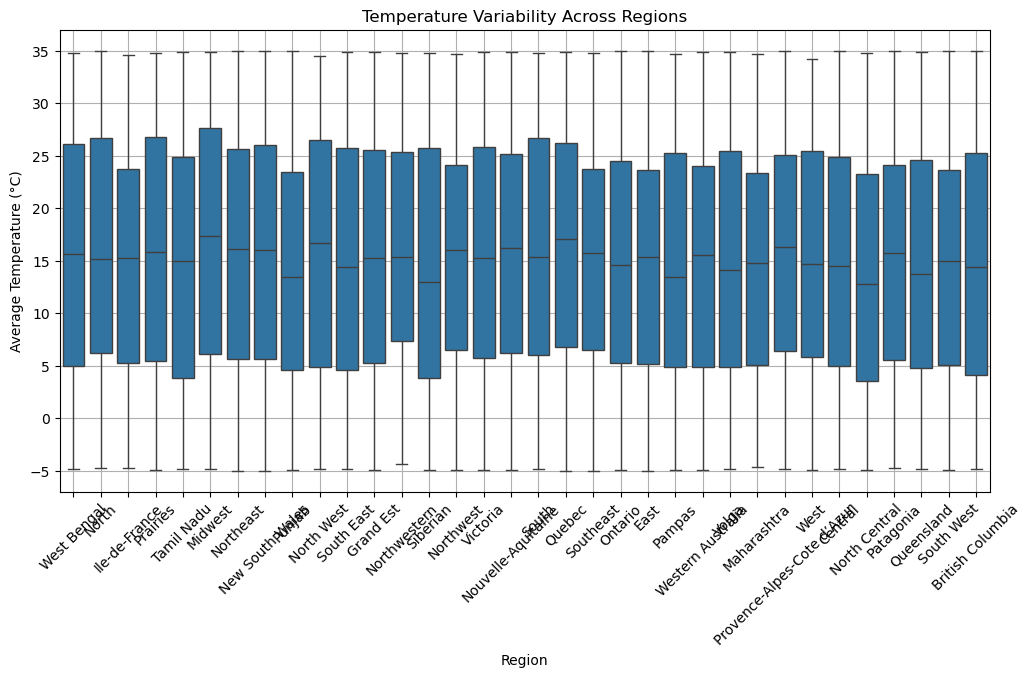

In [24]:
# Boxplot – Climate Variability by Region
# Regions with extreme temperatures might be more vulnerable to climate change.

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Region", y="Average_Temperature_C")
plt.title("Temperature Variability Across Regions")
plt.xlabel("Region")
plt.ylabel("Average Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Partial Dependence Plots (PDPs)

Added PDPs to understand the marginal effect of key climate variables (e.g., temperature, precipitation) on crop yield.

<Figure size 1000x600 with 0 Axes>

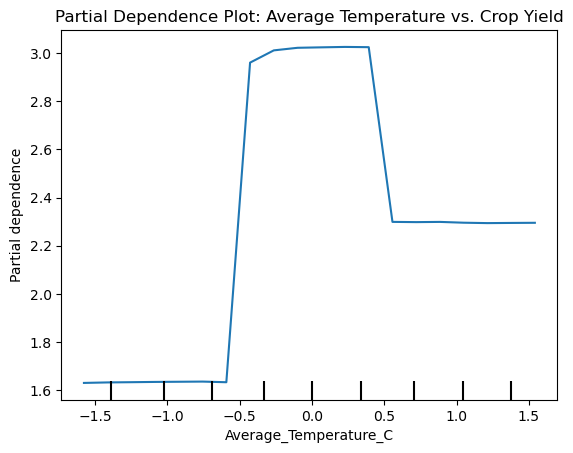

<Figure size 1000x600 with 0 Axes>

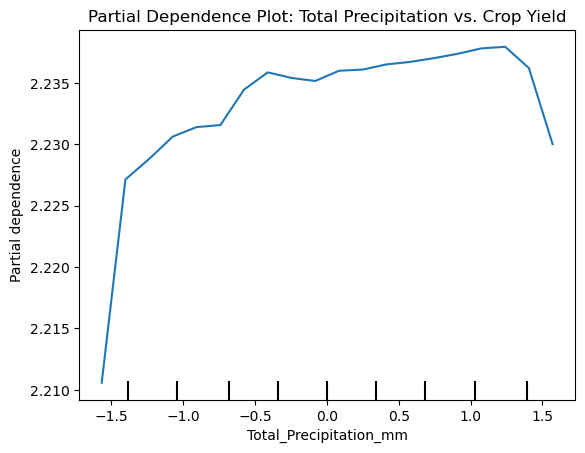

In [31]:
from sklearn.inspection import PartialDependenceDisplay

# Partial Dependence Plot for Average Temperature
plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    best_model, X_train_scaled, features=[0], feature_names=features, grid_resolution=20
)
plt.title("Partial Dependence Plot: Average Temperature vs. Crop Yield")
plt.show()

# Partial Dependence Plot for Total Precipitation
plt.figure(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    best_model, X_train_scaled, features=[1], feature_names=features, grid_resolution=20
)
plt.title("Partial Dependence Plot: Total Precipitation vs. Crop Yield")
plt.show()

### Scenario Analysis

Added a scenario analysis to simulate the impact of climate change (e.g., increased temperature) on crop yield.

Average Impact of +2°C on Crop Yield: 0.03 MT/HA


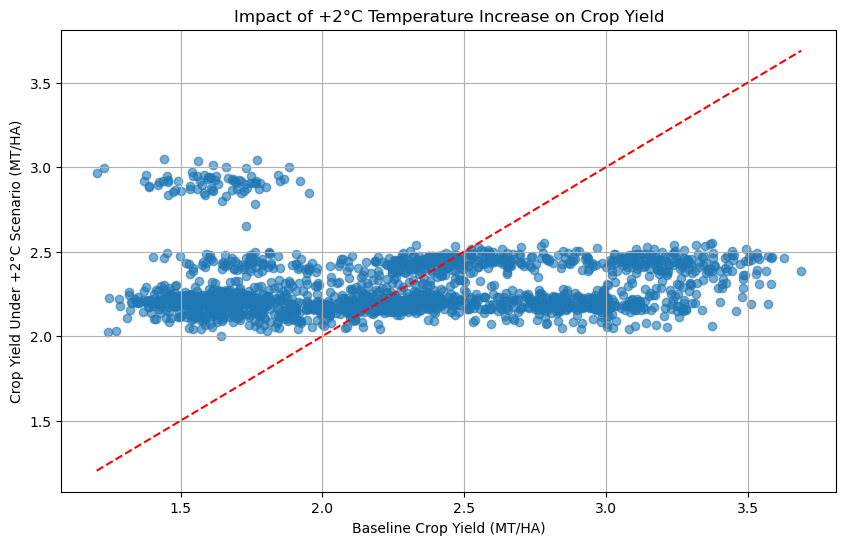

In [32]:
# Scenario Analysis: Simulate the impact of increased temperature on crop yield
X_test_scenario = X_test_scaled.copy()
X_test_scenario[:, 0] += 2  # Increase Average_Temperature_C by 2°C

# Predict crop yield under the scenario
y_pred_scenario = best_model.predict(X_test_scenario)

# Compare with baseline predictions
scenario_impact = y_pred_scenario - y_pred
print(f"Average Impact of +2°C on Crop Yield: {scenario_impact.mean():.2f} MT/HA")

# Plot the impact
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred_scenario, alpha=0.6)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Baseline Crop Yield (MT/HA)")
plt.ylabel("Crop Yield Under +2°C Scenario (MT/HA)")
plt.title("Impact of +2°C Temperature Increase on Crop Yield")
plt.grid(True)
plt.show()

## Conclusion

The evaluation metrics—MAE, MSE, and R²—highlight the challenges faced by both models, with both exhibiting relatively weak performance. The low R² values (approximately 29.9% for the baseline model and 26.96% for the XGBoost model) indicate that neither model effectively captures the variance in the target variable, suggesting that further improvements are needed in terms of model complexity, feature engineering, or hyperparameter tuning. Additionally, the MAE and MSE values for both models reflect substantial errors in prediction, which points to the potential need for more refined approaches, including possibly using more sophisticated algorithms or exploring additional features.

The correlation analysis provided valuable insights into the relationships between key variables, such as the strong positive correlation between average temperature and total precipitation, as well as between crop yield and economic impact. These insights are vital for improving model performance, as they suggest that features like temperature, precipitation, and crop yield may play crucial roles in predicting economic outcomes in agriculture. Furthermore, the moderate correlations between variables like irrigation access and weather risk, as well as CO2 emissions and fertilizer use, indicate the complex interplay between environmental factors and agricultural practices, which should be considered when refining the predictive models.

## Future
    
While the current models show room for improvement, the analysis of correlations and the insights gained about the relationships between key features offer valuable directions for future work. Future iterations of the model should focus on enhancing feature selection, exploring advanced algorithms, and potentially incorporating more granular data to improve predictive accuracy and better capture the complexity of the agricultural and environmental systems being studied. This will ultimately lead to more reliable predictions and a deeper understanding of the factors influencing agricultural outcomes and environmental risks.